In [1]:
import cPickle as pickle
import matplotlib.pylab as pl
%matplotlib inline

In [2]:
accuracy_table, progress_table = [], []
constant_transition_accuracy_table, constant_transition_progress_table = [], []
for N in range(21):
    accuracy, progress = \
        pickle.load(open('info/triple-state-refined-residual-network-%d' % (N), 'rb'))
    accuracy_table.append(accuracy)
    progress_table.append(progress)
    constant_transition_accuracy, constant_transition_progress = \
        pickle.load(open('info/triple-state-refined-residual-network-%d-constant-transition' % (N), 'rb'))
    constant_transition_accuracy_table.append(constant_transition_accuracy)
    constant_transition_progress_table.append(constant_transition_progress)

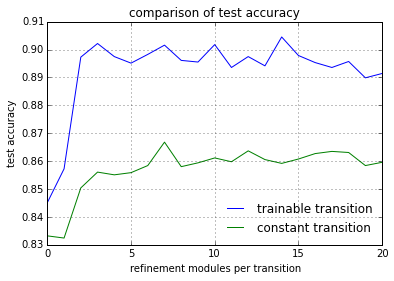

In [3]:
pl.plot(range(len(accuracy_table)), accuracy_table, label='trainable transition')
pl.plot(range(len(constant_transition_accuracy_table)), constant_transition_accuracy_table, label='constant transition')
pl.grid()
pl.title('comparison of test accuracy')
pl.xlabel('refinement modules per transition')
pl.ylabel('test accuracy')
pl.legend(framealpha=0, loc='best')

In [4]:
def plot_progress(n, entry, plot):
    table = progress_table[n][entry]
    constant_transition_table = constant_transition_progress_table[n][entry]
    plot.plot(range(len(table)), table, label='trainable transition')
    plot.plot(range(len(constant_transition_table)), constant_transition_table, label='constant transition')
    plot.set_title(entry.replace('_', ' '))

/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


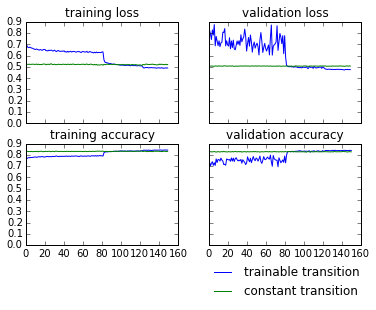

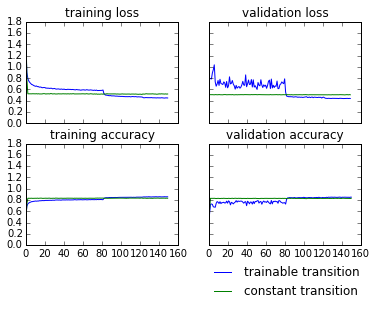

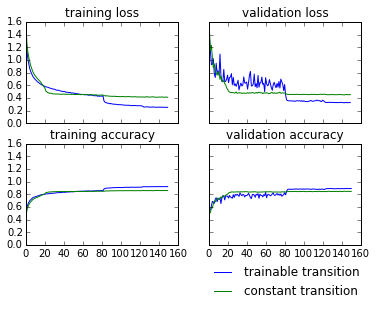

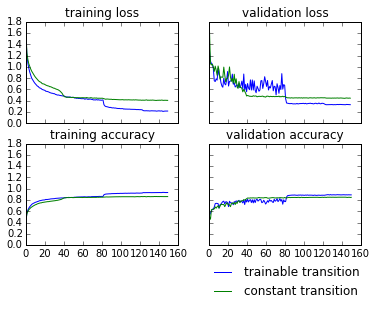

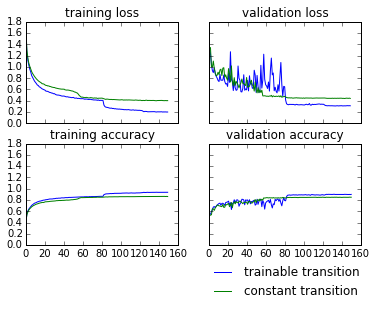

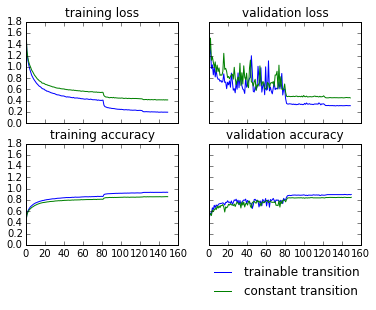

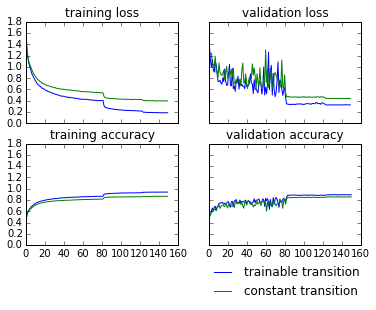

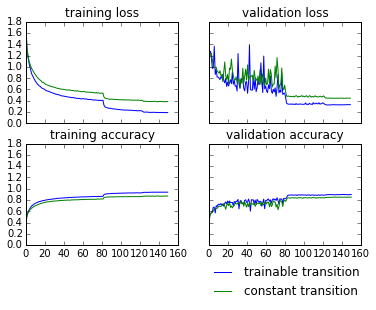

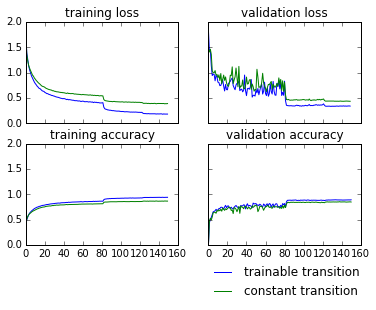

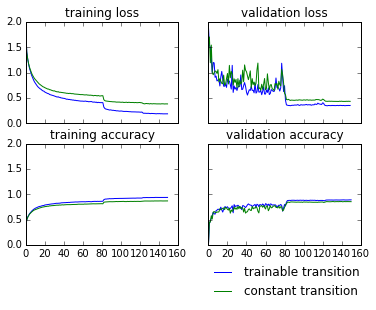

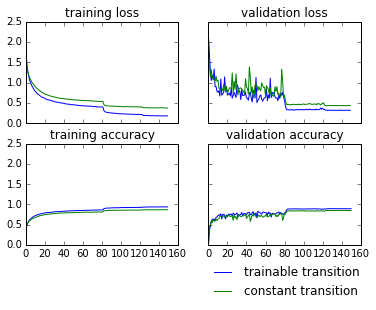

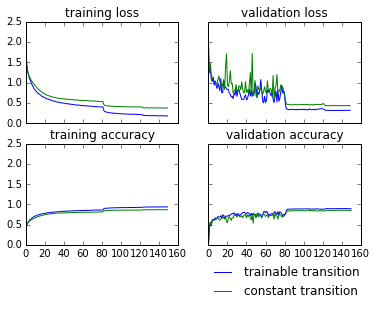

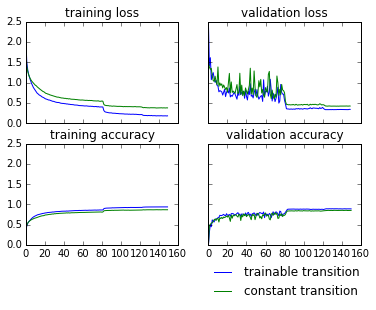

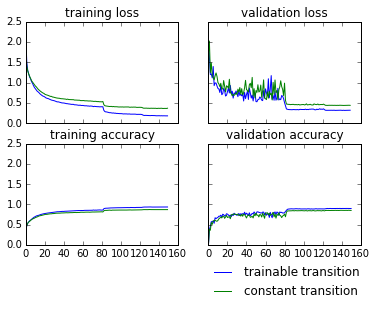

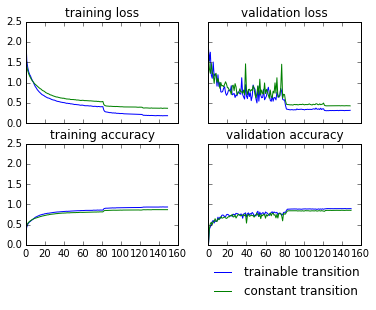

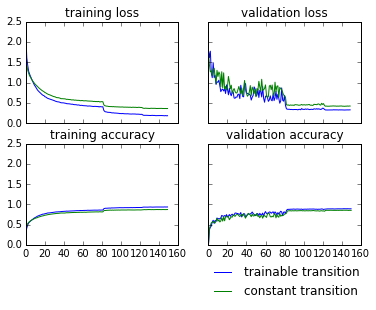

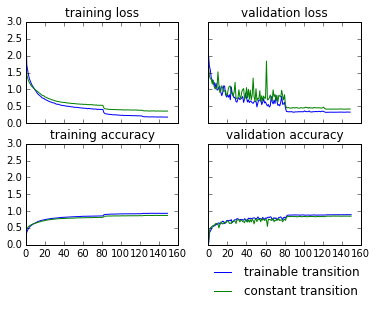

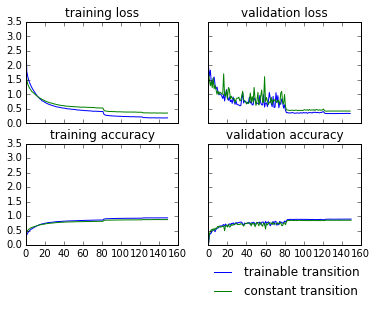

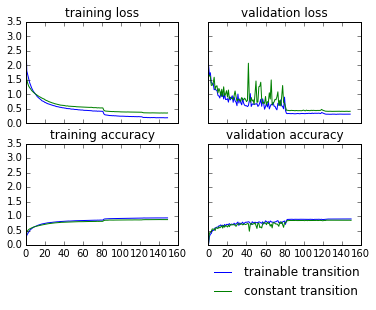

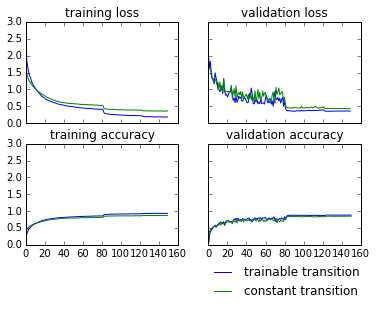

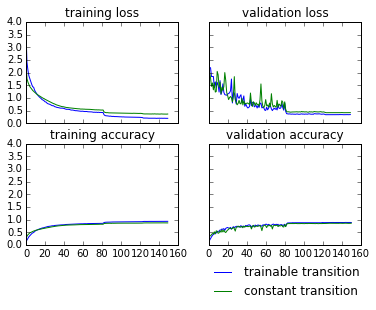

In [5]:
for N in range(21):
    f, plot_array = pl.subplots(2, 2, sharex=True, sharey=True)
    plot_progress(N, 'training_loss', plot_array[0, 0])
    plot_progress(N, 'validation_loss', plot_array[0, 1])
    plot_progress(N, 'training_accuracy', plot_array[1, 0])
    plot_progress(N, 'validation_accuracy', plot_array[1, 1])
    pl.legend(bbox_to_anchor=(0.5, -0.1), loc=9, framealpha=0)